Agenda today:
1. Overview of NLP
2. Pre-Prosessing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
3. Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)


## Activation discussion:

Unmute yourself and share your thoughts about:
 - What makes text mining hard?
 - How is it different than other types of analysis we've done?
 - What are some applications of text mining you've heard of? (or are _interested_ in?)
 
 <img src = 'https://media.giphy.com/media/WqLmcthJ7AgQKwYJbb/giphy.gif' alt="Drawing" style="width: 300px;"  float = 'right'> </img>
 

## 1. Overview of NLP
NLP allows computers to interact with text data in a structured and sensible way. In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Classifying documents 
- Speech recognition and audio processing 

In this section, we will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

# NLP process 
<img src="img/nlp_process.png" style="width:1000px;">

# 2. Preprocessing for NLP

In [205]:
#!pip install nltk
#!pip install wordcloud

We will be working with a dataset which includes both satirical (The Onion) and real news articles. 

We refer to the entire set of articles as the **corpus**.  

In [386]:
import pandas as pd

corpus = pd.read_csv('data/satire_nosatire.csv')
corpus.shape

(1000, 2)

Each article in the corpus is refered to as a **document**.

It is a balanced dataset with 500 documents of each category. 

In [207]:
corpus.target.value_counts()

1    500
0    500
Name: target, dtype: int64

### Tokenization 

In order to convert the texts into data suitable for machine learning, we need to break down the documents into smaller parts. 

The first step in doing that is tokenization.

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

Let's consider the first document in our corpus:

In [208]:
first_document = corpus.iloc[0].body

There are many ways to tokenize our document. 

It is a long string, so the first way we might consider is to split it by spaces.

In [209]:
first_document.split()[:30]

['Noting',
 'that',
 'the',
 'resignation',
 'of',
 'James',
 'Mattis',
 'as',
 'Secretary',
 'of',
 'Defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,',
 'a',
 'worried',
 'populace',
 'told',
 'reporters']

In creating tokens in this way, what problems do we see?

#### Chat out some problems (don't look down)

<img src="https://media.giphy.com/media/ZaiC2DYDRiqhQ269nz/giphy.gif" style="width:1500px;">

We are trying to create a set of tokens with high semantic value.  In other words, we want to isolate text which best represents the meaning in each document.  


## Common text cleaning tasks:  
  1. remove capitalization  
  2. remove punctuation  
  3. remove stopwords  
  4. remove numbers

We could manually perform all of these tasks with string operations

## Capitalization

When we create our matrix of words associated with our corpus, capital letters will mess things up.  The semantic value of a word used at the beginning of a sentence is the same as that same word in the middle of the sentence.  In the two sentences:

sentenceb_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."

Excessive has the same semantic value, but will be treated as two separate tokens because of capitals.

In [210]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."

excessive = sentence_one.split(' ')[0]
Excessive = sentence_two.split(' ')[-2]
print(excessive, Excessive)
excessive == Excessive

Excessive excessive


False

In [211]:
## Manual removal of capitals

manual_cleanup = [token.lower() for token in first_document.split(' ')]
manual_cleanup[:25]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,']

In [212]:
print(f"Our initial token set for our document is {len(manual_cleanup)} words long")

Our initial token set for our document is 154 words long


## Punctuation

Like capitals, splitting on white space will create tokens which include punctuation that will muck up our semantics.  

Returning to the above example, 'gerrymandering' and 'gerrymandering.' will be treated as different tokens.

In [213]:
no_punct = sentence_one.split(' ')[1]
punct = sentence_two.split(' ')[-1]
print(no_punct, punct)
no_punct == punct

gerrymandering gerrymandering.


False

In [214]:
## Manual removal of punctuation
# string library!
import string

string.punctuation

manual_cleanup = [''.join(ch for ch in s if ch not in string.punctuation) for s in manual_cleanup]
manual_cleanup[:25]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks']

### Stopwords

Stopwords are the filler words in a language: prepositions, articles, conjunctions. They have low semantic value, and almost always need to be removed.  

Luckily, NLTK has lists of stopwords ready for our use.

In [215]:
from nltk.corpus import stopwords
stopwords.__dict__

{'_fileids': ['arabic',
  'azerbaijani',
  'danish',
  'dutch',
  'english',
  'finnish',
  'french',
  'german',
  'greek',
  'hungarian',
  'indonesian',
  'italian',
  'kazakh',
  'nepali',
  'norwegian',
  'portuguese',
  'romanian',
  'russian',
  'slovene',
  'spanish',
  'swedish',
  'tajik',
  'turkish'],
 '_root': FileSystemPathPointer('/Users/johnmaxbarry/nltk_data/corpora/stopwords'),
 '_encoding': 'utf8',
 '_tagset': None,
 '_unload': <bound method LazyCorpusLoader.__load.<locals>._unload of <WordListCorpusReader in '/Users/johnmaxbarry/nltk_data/corpora/stopwords'>>}

In [216]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Let's see which stopwords are present in our first document.

In [217]:
stops = [token for token in manual_cleanup if token in stopwords.words('english')]
stops[:10]

['that', 'the', 'of', 'as', 'of', 'the', 'of', 'the', 'in', 'than']

In [218]:
print(f'There are {len(stops)} stopwords in the first document')

There are 63 stopwords in the first document


In [219]:
print(f'That is {len(stops)/len(manual_cleanup): .2%} of our text')

That is  40.91% of our text


Let's also use the FreqDist tool to look at the makeup of our text before and after removal

In [220]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

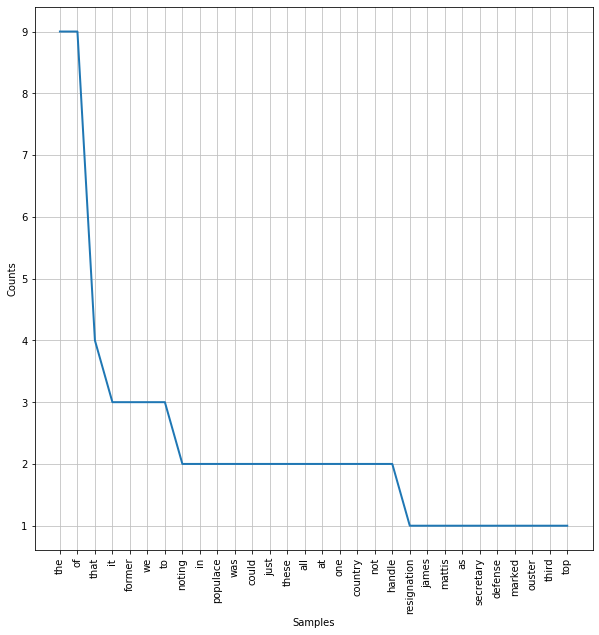

In [221]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)


In [222]:
manual_cleanup = [token for token in manual_cleanup if token not in stopwords.words('english')]

In [223]:
# We can also customize our stopwords list

custom_sw = stopwords.words('english')
custom_sw.extend(["i'd","say"] )
custom_sw[-10:]

['wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "i'd",
 'say']

In [224]:
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]
len(manual_cleanup)

90

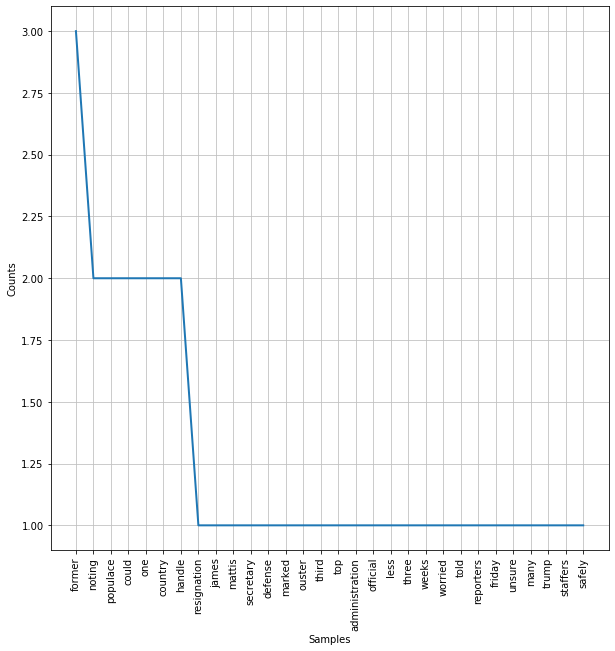

In [225]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

#### Numbers

Numbers also usually have low semantic value. Their removal can help improve our models. 

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

Other helpful resources:
  - https://regexcrossword.com/
  - https://www.regular-expressions.info/tutorial.html

We can use regex to isolate numbers



In [226]:
import re

# 1 or more digits
pattern = '\d+'

number = re.findall( pattern, first_document)
number

['53', '323']

In [227]:
first_document

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [228]:
number

['53', '323']

Sklearn and NLTK provide us with a suite of tokenizers for our text preprocessing convenience.

In [240]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize
from sklearn.feature_extraction.text import tokenize

In [241]:
first_document

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [267]:
import re
re.findall(r"([a-zA-Z]+(?:'[a-z]+)?)" , "I'd")

["I'd"]

In [302]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]
first_doc

['noting',
 'resignation',
 'james',
 'mattis',
 'secretary',
 'defense',
 'marked',
 'ouster',
 'third',
 'top',
 'administration',
 'official',
 'less',
 'three',
 'weeks',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'unsure',
 'many',
 'former',
 'trump',
 'staffers',
 'could',
 'safely',
 'reabsorb',
 'jesus',
 'can’t',
 'take',
 'back',
 'assholes',
 'need',
 'time',
 'process',
 'one',
 'get',
 'next',
 'said',
 'year',
 'old',
 'gregory',
 'birch',
 'naperville',
 'il',
 'echoing',
 'concerns',
 'million',
 'americans',
 'also',
 'noting',
 'country',
 'truly',
 'beginning',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 'sustainable',
 'i’d',
 'handle',
 'maybe',
 'one',
 'two',
 'former',
 'members',
 'trump’s',
 'inner',
 'circle',
 'remainder',
 'year',
 'that’s',
 'country',
 'limits',
 'u',
 'populace',
 'confirmed',
 'could',
 'handle',
 'pieces',
 'shit',
 'trying',
 'rejoin',
 'society']

# Stemming

Most of the semantic meaning of a word is held in the root, which is usually the beginning of a word.  Conjugations and plurality do not change the semantic meaning. "eat", "eats", and "eating" all have essentially the same meaning packed into eat.   

Stemmers consolidate similar words by chopping off the ends of the words.

![stemmer](img/stemmer.png)

There are different stemmers available.  The two we will use here are the **Porter** and **Snowball** stemmers.  A main difference between the two is how agressively it stems, Porter being less agressive.

In [303]:
from nltk.stem import *

p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language="english")

In [304]:
p_stemmer.stem(first_doc[0])

'note'

In [305]:
s_stemmer.stem(first_doc[0])

'note'

In [306]:
for word in first_doc:
    p_word = p_stemmer.stem(word)
    s_word = s_stemmer.stem(word)
    
    if p_word != s_word:
        print(p_word, s_word)
    

jesu jesus
can’t can't
napervil napervill
i’d i'd
trump’ trump
that’ that


In [307]:
first_doc = [p_stemmer.stem(word) for word in first_doc]

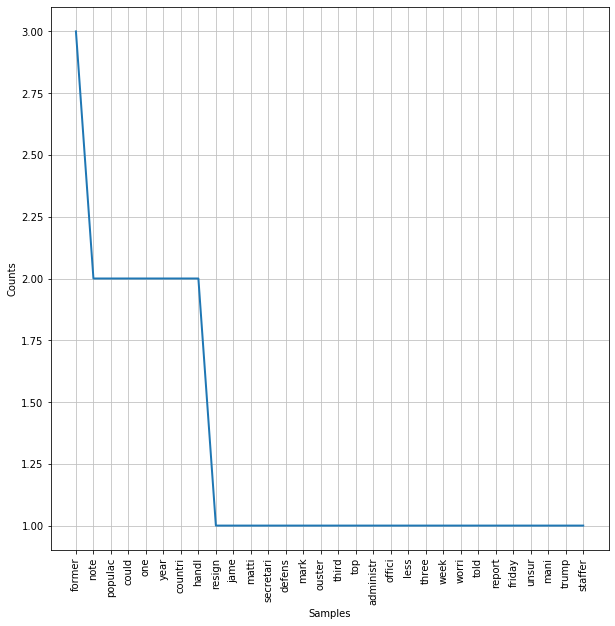

In [308]:
fdist = FreqDist(first_doc)
plt.figure(figsize=(10,10))
fdist.plot(30)

# Lemming

Lemming is a bit more sophisticated that the stem choppers.  Lemming uses part of speech tagging to determine how to transform a word.  In that 
Lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.  It can handle words such as "mouse", whose plural "mice" the stemmers would not lump together with the original. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

![lemmer](img/lemmer.png)


In [311]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 


'mouse'

In [316]:
print(f'Mice becomes: {lemmatizer.lemmatize("mice")}')
print(f'Noting becomes: {lemmatizer.lemmatize(first_doc[0])}')

Mice becomes: mouse
Noting becomes: note


In [331]:
# However, look at the output below:
    
sentence = "He saw the trees down sawed down"
lemmed_sentence = [lemmatizer.lemmatize(token) for token in sentence.split(' ')]
lemmed_sentence

['He', 'saw', 'the', 'tree', 'down', 'sawed', 'down']

In [330]:
# What should have changed form but didn't?

Lemmatizers depend on POS tagging, and defaults to noun.

With a little bit of work, we can POS tag our text.

In [355]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]


In [356]:
from nltk import pos_tag
# Use nltk's pos_tag to tag our words
first_doc_tagged = pos_tag(first_doc)
first_doc_tagged

[('noting', 'VBG'),
 ('resignation', 'NN'),
 ('james', 'NNS'),
 ('mattis', 'VBP'),
 ('secretary', 'NN'),
 ('defense', 'NN'),
 ('marked', 'VBD'),
 ('ouster', 'JJ'),
 ('third', 'JJ'),
 ('top', 'JJ'),
 ('administration', 'NN'),
 ('official', 'NN'),
 ('less', 'JJR'),
 ('three', 'CD'),
 ('weeks', 'NNS'),
 ('worried', 'VBD'),
 ('populace', 'NN'),
 ('told', 'VBD'),
 ('reporters', 'NNS'),
 ('friday', 'JJ'),
 ('unsure', 'JJ'),
 ('many', 'JJ'),
 ('former', 'JJ'),
 ('trump', 'NN'),
 ('staffers', 'NNS'),
 ('could', 'MD'),
 ('safely', 'RB'),
 ('reabsorb', 'VB'),
 ('jesus', 'NN'),
 ('can’t', 'NNS'),
 ('take', 'VBP'),
 ('back', 'RP'),
 ('assholes', 'NNS'),
 ('need', 'VBP'),
 ('time', 'NN'),
 ('process', 'NN'),
 ('one', 'CD'),
 ('get', 'NN'),
 ('next', 'IN'),
 ('said', 'VBD'),
 ('year', 'NN'),
 ('old', 'JJ'),
 ('gregory', 'NN'),
 ('birch', 'NN'),
 ('naperville', 'FW'),
 ('il', 'NN'),
 ('echoing', 'VBG'),
 ('concerns', 'NNS'),
 ('million', 'CD'),
 ('americans', 'NNS'),
 ('also', 'RB'),
 ('noting', 'VBG

In [357]:
# Then transform the tags into the tags of our lemmatizers
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [358]:
first_doc_tagged = [(token[0], get_wordnet_pos(token[1]))
             for token in first_doc_tagged]

In [359]:
first_doc_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in first_doc_tagged]

In [361]:
first_doc_lemmed[:10]

['note',
 'resignation',
 'james',
 'mattis',
 'secretary',
 'defense',
 'mark',
 'ouster',
 'third',
 'top']

## Part 3. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called Bag-of-words (BoW). 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:

![document term matrix](img/document_term_matrix.png)

In [368]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer()
X = vec.fit_transform([" ".join(first_doc_lemmed)])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())


administration  advisor  also  american  asshole  back  begin  birch  can  \
0               1        1     1         1        1     1      1      1    1   

   circle  ...  time  top  truly  trump  try  two  unsure  week  worry  year  
0       1  ...     1    1      1      2    1    1       1     1      1     2  

[1 rows x 76 columns]

That is not very exciting for one document. The idea is to make a document term matrix for all of the words in our corpus.

In [374]:
corpus

body  target
0    Noting that the resignation of James Mattis as...       1
1    Desperate to unwind after months of nonstop wo...       1
2    Nearly halfway through his presidential term, ...       1
3    Attempting to make amends for gross abuses of ...       1
4    Decrying the Senate’s resolution blaming the c...       1
..                                                 ...     ...
995   Britain’s opposition leader Jeremy Corbyn wou...       0
996   Turkey will take over the fight against Islam...       0
997   Malaysia is seeking $7.5 billion in reparatio...       0
998   An Israeli court sentenced a Palestinian to 1...       0
999   At least 22 people have died due to landslide...       0

[1000 rows x 2 columns]

In [375]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

adding  administration  advisor  also  americans  another  assholes  back  \
0       0               1        1     1          1        0         1     1   
1       1               0        0     0          0        1         0     1   

   bank  beginning  ...  want  wants  weeks  whether  whole  witnesses  work  \
0     0          1  ...     0      0      1        0      0          0     0   
1     1          0  ...     2      1      1        1      1          1     1   

   worried  year  yet  
0        1     2    0  
1        0     0    1  

[2 rows x 176 columns]

In [376]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

adding  adding wants  administration  administration official  advisor  \
0       0             0               1                        1        1   
1       1             1               0                        0        0   

   advisor michael  also  also noting  americans  americans also  ...  \
0                1     1            1          1               1  ...   
1                0     0            0          0               0  ...   

   witnesses want  work  work investigating  worried  worried populace  year  \
0               0     0                   0        1                 1     2   
1               1     1                   1        0                 0     0   

   year country  year old  yet  yet another  
0             1         1    0            0  
1             0         0    1            1  

[2 rows x 378 columns]

Our document term matrix gets bigger and bigger, with more and more zeros, becoming sparser and sparser.

In [378]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

aa  aa united  aaaaaaah  aaaaaaah aaaaaah  aaaaaah  aaaaaah deal  aaaaargh  \
0   0          0         0                 0        0             0         0   
1   0          0         0                 0        0             0         0   
2   0          0         0                 0        0             0         0   
3   0          0         0                 0        0             0         0   
4   0          0         0                 0        0             0         0   

   aaaaargh falls  aaaah  aaaah internet  ...  zuercher kantonalbank  zverev  \
0               0      0               0  ...                      0       0   
1               0      0               0  ...                      0       0   
2               0      0               0  ...                      0       0   
3               0      0               0  ...                      0       0   
4               0      0               0  ...                      0       0   

   zverev two  zych  zych mother  zych whose  zzouss  zzzzzst  \
0           0     0            0           0       0        0   
1           0     0            0           0       0        0   
2           0     0            0           0       0        0   
3           0     0            0           0       0        0   
4           0     0            0           0       0        0   

   zzzzzst compilation  zzzzzst shut  
0                    0             0  
1                    0             0  
2                    0             0  
3                    0             0  
4                    0             0  

[5 rows x 201647 columns]

We can set upper and lower limits to the word frequency.

In [389]:
corpus.body

0      Noting that the resignation of James Mattis as...
1      Desperate to unwind after months of nonstop wo...
2      Nearly halfway through his presidential term, ...
3      Attempting to make amends for gross abuses of ...
4      Decrying the Senate’s resolution blaming the c...
                             ...                        
995     Britain’s opposition leader Jeremy Corbyn wou...
996     Turkey will take over the fight against Islam...
997     Malaysia is seeking $7.5 billion in reparatio...
998     An Israeli court sentenced a Palestinian to 1...
999     At least 22 people have died due to landslide...
Name: body, Length: 1000, dtype: object

In [390]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2], min_df=2, max_df=25)
X = vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())


aapl  aaron  aaron ross  ab  abandon  abandon conservatives  abandoned  \
0     0      0           0   0        0                      0          0   
1     0      0           0   0        0                      0          0   
2     0      0           0   0        0                      0          0   
3     0      0           0   0        0                      0          0   
4     0      0           0   0        0                      0          0   
5     0      0           0   0        0                      0          0   
6     0      0           0   0        0                      0          0   
7     0      0           0   0        0                      0          0   
8     0      0           0   0        0                      0          0   
9     0      0           0   0        0                      0          0   

   abandoned grassroots  abandoning  abandoning quarter  ...  zone  zone eu  \
0                     0           0                   0  ...     0        0   
1                     0           0                   0  ...     0        0   
2                     0           0                   0  ...     0        0   
3                     0           0                   0  ...     0        0   
4                     0           0                   0  ...     0        0   
5                     0           0                   0  ...     0        0   
6                     0           0                   0  ...     0        0   
7                     0           0                   0  ...     0        0   
8                     0           0                   0  ...     0        0   
9                     0           0                   0  ...     0        0   

   zones  zoo  zoo closed  zooming  zor  zte  zte corp  zuckerberg  
0      0    0           0        0    0    0         0           0  
1      0    0           0        0    0    0         0           0  
2      0    0           0        0    0    0         0           0  
3      0    0           0        0    0    0         0           0  
4      0    0           0        0    0    0         0           0  
5      0    0           0        0    0    0         0           0  
6      0    0           0        0    0    0         0           0  
7      0    0           0        0    0    0         0           0  
8      0    0           0        0    0    0         0           0  
9      0    0           0        0    0    0         0           0  

[10 rows x 31350 columns]

### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

- TF (Term Frequency)
term frequency is simply the frequency of words in a document, and it can be represented as the number of times a term shows up in a document. 

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number\ of\ documents}{num\ of\ documents\ containing\ w})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [397]:
tf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = tf_vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = tf_vec.get_feature_names())
df.head()

aa  aaaaaaah  aaaaaah  aaaaargh  aaaah  aaah  aaargh  aah  aahing  aap  \
0  0.0       0.0      0.0       0.0    0.0   0.0     0.0  0.0     0.0  0.0   
1  0.0       0.0      0.0       0.0    0.0   0.0     0.0  0.0     0.0  0.0   
2  0.0       0.0      0.0       0.0    0.0   0.0     0.0  0.0     0.0  0.0   
3  0.0       0.0      0.0       0.0    0.0   0.0     0.0  0.0     0.0  0.0   
4  0.0       0.0      0.0       0.0    0.0   0.0     0.0  0.0     0.0  0.0   

   ...  zoos  zor  zozovitch  zte  zuckerberg  zuercher  zverev  zych  zzouss  \
0  ...   0.0  0.0        0.0  0.0         0.0       0.0     0.0   0.0     0.0   
1  ...   0.0  0.0        0.0  0.0         0.0       0.0     0.0   0.0     0.0   
2  ...   0.0  0.0        0.0  0.0         0.0       0.0     0.0   0.0     0.0   
3  ...   0.0  0.0        0.0  0.0         0.0       0.0     0.0   0.0     0.0   
4  ...   0.0  0.0        0.0  0.0         0.0       0.0     0.0   0.0     0.0   

   zzzzzst  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 23457 columns]

In [402]:
df['zuckerberg'].value_counts()

0.000000    997
0.062215      1
0.098663      1
0.055719      1
Name: zuckerberg, dtype: int64

In [407]:
tf_vec.vocabulary_

{'noting': 14228,
 'resignation': 17453,
 'james': 11083,
 'mattis': 12876,
 'secretary': 18492,
 'defense': 5328,
 'marked': 12753,
 'ouster': 14711,
 'third': 21061,
 'top': 21290,
 'administration': 293,
 'official': 14445,
 'less': 12042,
 'three': 21095,
 'weeks': 22858,
 'worried': 23185,
 'populace': 15784,
 'told': 21256,
 'reporters': 17365,
 'friday': 8389,
 'unsure': 22125,
 'many': 12705,
 'former': 8261,
 'trump': 21632,
 'staffers': 19831,
 'could': 4654,
 'safely': 18072,
 'reabsorb': 16838,
 'jesus': 11159,
 'take': 20692,
 'back': 1540,
 'assholes': 1254,
 'need': 13936,
 'time': 21176,
 'process': 16146,
 'one': 14516,
 'get': 8762,
 'next': 14045,
 'said': 18088,
 'year': 23300,
 'old': 14477,
 'gregory': 9106,
 'birch': 2136,
 'naperville': 13830,
 'il': 10220,
 'echoing': 6555,
 'concerns': 4203,
 'million': 13240,
 'americans': 723,
 'also': 658,
 'country': 4674,
 'truly': 21631,
 'beginning': 1905,
 'reintegrate': 17182,
 'national': 13870,
 'security': 18510,
 

In [409]:
df['administration'].value_counts()

0.000000    933
0.056537      2
0.130272      2
0.045361      1
0.085129      1
           ... 
0.027153      1
0.031600      1
0.032887      1
0.037210      1
0.065937      1
Name: administration, Length: 66, dtype: int64

# Pair: 

For a final exercise, work through in pairs the following exercise.

Create a document term matrix of the 1000 document corpus.  The vocabulary should have no stopwords, no numbers, no punctuation, and be lemmatized.  The Document-Term Matrix should be created using tfidf.